# mp-LP example

## Problem statement

Solve:

$$
\begin{aligned}
\min \quad & -8.1x_1-10.8x_2 \\
\textrm{s.t.} \quad & 0.8x_1 + 0.44x_2 \le 24000 +\theta_1 \\
& 0.05x_1 +0.1x_2\le2000 +\theta_2 \\
& 0.1x_1 + 0.36x_2 \le 6000 \\
& x_1, x_2 \ge 0 \\
& 0 \le \theta_1 \le 6000 \\
& 0 \le \theta_2 \le 500 \\
\end{aligned}
$$

With $x_1$, $x_2$ being optimised variables, and $\theta_1$, $\theta_2$ varying input parameters of the optimisation problem.

We would like to find out how the optimal solution ${x_1}^\ast$, ${x_2}^\ast$ change when $\theta_1$, $\theta_2$ vary, </br>
i.e. express ${x_1}^\ast$, ${x_2}^\ast$ as functions of $\theta_1$, $\theta_2$

## Inputs

Convert to a format suitable for the solver:

$$
\begin{aligned}
\min \quad & X^TQX + mX \\
\textrm{s.t.} \quad & AX +W\theta \le b \\
\end{aligned}
$$

$$
m = \begin{bmatrix}
    -8.1 & -10.8    
\end{bmatrix}
$$

$$
A = 
\begin{bmatrix}
    0.8 & 0.44 \\
    0.05 & 0.1 \\
    0.1 & 0.36 \\
    -1 & 0 \\
    0 & -1 \\
    0 & 0 \\
    0 & 0 \\
    0 & 0 \\
    0 & 0 \\    
\end{bmatrix}
W = \begin{bmatrix}
    -1 & 0 \\
    0 & -1 \\
    0 & 0 \\
    0 & 0 \\
    0 & 0 \\
    -1 & 0 \\
    1 & 0 \\
    0 & -1 \\
    0 & 1 \\    
\end{bmatrix}
b = 
\begin{bmatrix}
    -24000 \\
    2000 \\
    6000 \\
    0 \\
    0 \\
    0 \\
    6000 \\
    0 \\
    500 \\    
\end{bmatrix}
$$

$Q$ can be ignored (linear problem).

In [32]:
import numpy as np

A = np.array(
    [[0.8, 0.44],
     [0.05, 0.1],
     [0.1, 0.36],
     [-1.0, 0.0],
     [0.0, -1.0],
     [0.0, 0.0],
     [0.0, 0.0],
     [0.0, 0.0],
     [0.0, 0.0]]
)

W = np.array(
    [[-1.0, 0.0],
     [0.0, -1.0],
     [0.0, 0.0],
     [0.0, 0.0],
     [0.0, 0.0],
     [-1.0, 0.0],
     [1.0, 0.0],
     [0.0, -1.0],
     [0.0, 1.0]]
)

b = np.array(
    [24000.0, 2000.0, 6000.0, 0.0, 0.0, 0.0, 6000.0, 0.0, 500.0]
)

m = np.array(
    [-8.1, -10.8]
)

## Solve

In [33]:
from parametric_model.solvers.region_generator import ParametricSolver

mp = ParametricSolver(A, W, b, m)
mp.solve()
print('Number of regions = ' + str(len(mp.regions)))


Number of regions = 2


## Show regions

Make a simple function that prints out the equations for the boundaries and solutions of each region:

In [34]:
np.set_printoptions(suppress=True)


def print_boundaries(region_index):
    """Print the boundary and solution equations of specified region.
    """
    region = mp.regions[region_index]
    
    # process boundary outputs
    bound_lhs = np.concatenate(
        (region['firm_bound_A'], region['added_bound_A']),
        axis=0)
    bound_rhs = np.concatenate(
        (region['firm_bound_b'], region['added_bound_b']))
    bound_concat = np.concatenate(
        (bound_lhs, bound_rhs.reshape(-1, 1)),
        axis=1)
    
    # process solution outputs
    x_size = mp.x_size
    soln_concat = np.concatenate(
        (region['soln_A'], region['soln_b'].reshape(-1, 1)),
        axis=1)
    soln_concat = soln_concat[:x_size]
    
    # print outputs
    print(
        'Printing results in concatenated form for region ' 
        + str(region_index) + '...')
    print('Boundary equations:')
    print(np.round(bound_concat, 2))
    print('Optimal solution:')
    print(np.round(soln_concat, 2))
    print()
    

As there are only two varying parameters, critical regions are 2D and so can also be plotted in a chart:

Displaying optimal solution region map...


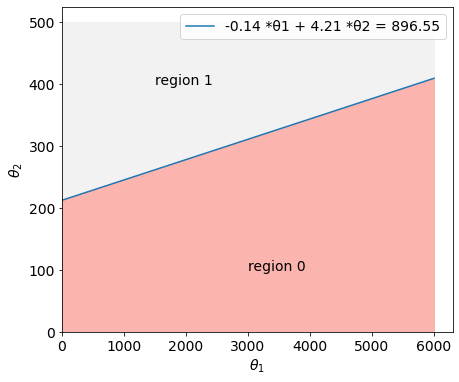

Printing results in concatenated form for region 0...
Boundary equations:
[[  -1.      0.      0.  ]
 [   1.      0.   6000.  ]
 [   0.     -1.      0.  ]
 [  -0.14    4.21  896.55]]
Optimal solution:
[[    1.72    -7.59 26206.9 ]
 [   -0.86    13.79  6896.55]]

Printing results in concatenated form for region 1...
Boundary equations:
[[  -1.      0.      0.  ]
 [   1.      0.   6000.  ]
 [   0.      1.    500.  ]
 [   0.14   -4.21 -896.55]]
Optimal solution:
[[    1.48    -0.   24590.16]
 [   -0.41    -0.    9836.07]]



In [35]:
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = [7, 7]
plt.rcParams.update({'font.size': 14})

# use imshow to show critical regions. 
# imshow takes a mesh of points in coordinates and display an image depending 
# on the value of each point. We can take each point to be a different combo of 
# parameter values. To check if a point is in region x, run the point values 
# through the inequality boundary equations of x, and check whether all 
# inequalities are met. If so, assign the point a colour that represents that region.
mesh_setting = 500
mesh_x = np.linspace(0., 6000., mesh_setting)
mesh_y = np.linspace(0., 500., mesh_setting)
x, y = np.meshgrid(mesh_x, mesh_y)
im_data = np.zeros((mesh_setting, mesh_setting))

for r in range(len(mp.regions)):
    region = mp.regions[r]
    # firm bounds and added bounds refer to boundaries specified in original
    # optimisation problem, and those generated from solving the mp. 
    # We do not need to differentiate here so put them together with concat.
    all_bounds_A = np.concatenate(
        (region['firm_bound_A'], region['added_bound_A']),
        axis=0)
    all_bounds_b = np.concatenate(
        (region['firm_bound_b'], region['added_bound_b']))
    
    true_false_matrix = np.full((mesh_setting, mesh_setting), True)
    for i in range(len(all_bounds_b)):
        in_boundary = \
            all_bounds_A[i, 0] * x + all_bounds_A[i, 1] * y <= all_bounds_b[i]
        true_false_matrix = np.logical_and(true_false_matrix, in_boundary)
    # assign a colour number - anything works as long as can differentiate regions
    im_data[true_false_matrix] = r/10        

im = plt.imshow(
    im_data,
    extent=(x.min(),x.max(),y.min(),y.max()),
    origin='lower',
    cmap="Pastel1",
    aspect=10,
    alpha=1
)
plt.annotate('region 0', xy=(3000, 100))
plt.annotate('region 1', xy=(1500, 400))

# plot boundary separating the two regions
bound_x = np.linspace(0, 6000, 6000)
region_0 = mp.regions[0]
bound_y = (
    region_0['added_bound_b'][0] - region_0['added_bound_A'][0, 0] * bound_x
)/region_0['added_bound_A'][0, 1]
plot_label = (
    str(round(region_0['added_bound_A'][0, 0], 2)) + ' *θ1 + ' +
    str(round(region_0['added_bound_A'][0, 1], 2)) + ' *θ2 = ' + 
    str(round(region_0['added_bound_b'][0], 2))
)
plot = plt.plot(bound_x, bound_y, label=plot_label) 

# other plot settings
plt.xlim(0, mesh_x.max() * 1.05)
plt.ylim(0, mesh_y.max() * 1.05)
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.legend()

# display results
print('Displaying optimal solution region map...')
plt.show()
for r in range(len(mp.regions)):
    print_boundaries(r)

## Summary

### Results

The above results means that when the values of $\theta_1$ and $\theta_2$ fall into region 0, </br>
solutions of $x_1$ and $x_2$ are given by: 

$
x_1 = 1.72 \,\theta_1 -7.59 \, \theta_2 + 26206.9 \\
x_2 = -0.86 \, \theta_1 + 13.79 \, \theta_2 + 6896.55
$

For region 1, </br>
solutions of $x_1$ and $x_2$ are given by: 

$
x_1 = 1.48 \, \theta_1 + 24590.16 \\
x_2 = -0.41 \, \theta_1 + 9836.07
$


### Importance

The parametric solution is useful in a few ways:

**Analysing optimal solution structure**

- Optimal solution available as a 'policy map'.
- We gain insight into the sensitivities of solution to parameters, and tipping points of policy changes.
- e.g. We know that in region 1, the solution is insensitive to $\theta_2$. We also know at which point this is no longer the case - when we cross the boundary from region 1 to 0, calculated to be $-0.14\theta_1 + 4.21\theta_2 = 896.55$

**'You only solve once'**

- We no longer need to solve the optimisation problem repeatedly to obtain optimal solutions at different input parameters.
- Look up which region the parameter values fall into, and run the parameter values through the solution equations of that region.
    

## Final verification

Finally, verify the correctness of the MP solution by comparing the results from the MP against solving LP directly.

In [36]:
from parametric_model.processing.inputs import get_zeros_rows_index
from parametric_model.solvers.generic_solver import GenericSolver


test_size = 100
np.random.seed(0)

    
def compare_mp_lp(theta):
    """Compare MP result with LP given varying parameter theta.
    """
    
    # get optimal solution from mp
    mp_soln = mp.get_soln(theta)
    
    # now solve LP
    # with LP, we substitute actual values into θ and solve a simple LP.
    # This means constraint rows with only θ terms are redundant. We can 
    # remove these rows from A, b and W.
    zeros_rows = get_zeros_rows_index(A)
    A_opt = np.delete(A, zeros_rows, axis=0)
    b_opt = np.delete(b, zeros_rows) 
    W_opt = np.delete(W, zeros_rows, axis=0)
    
    # AX + Wθ <= b
    # As θ is now a value, lump with b to form a new constant term.
    # AX <= (b - Wθ)
    b_minus_theta = b_opt - np.dot(W_opt, theta.reshape(mp.theta_size, -1)).reshape(-1)   
    
    # class 'GenericSolver' solves a direct LP/QP
    opt = GenericSolver(A_opt, b_minus_theta, m)
    opt.solve()
    
    results_match = np.allclose(mp_soln, opt.soln, rtol=0.0, atol=1e-6)
    if results_match:
        return True
    else:
        return False


def test_mp(test_size):
    """Test mp against LP using randomly generated test values of theta.
    """
    
    print('Running tests on MP with a test size of ' + str(test_size) + '...')
    
    # create test values of θ
    random_inputs = np.random.uniform(
        low=0.0, 
        high=1.0, 
        size=(test_size, mp.x_size))
    random_inputs[:, 0] = random_inputs[:, 0] * 6000.
    random_inputs[:, 1] = random_inputs[:, 1] * 500.
    
    # test and save result
    test_results = np.full((test_size), False)
    for t in range(test_size):
        theta = random_inputs[t, :]
        test_results[t] = compare_mp_lp(theta)

    all_tests_passed = np.all(test_results)
    if all_tests_passed:
        print('Tests passed. mp result matches LP for all tests.')
    else:
        print('Tests failed. MP result does not match LP for some tests.')
        

test_mp(test_size)

Running tests on MP with a test size of 100...
Tests passed. mp result matches LP for all tests.
